# Finding the movie genres with the highest avg vote rating for the last 10 years of data

# Step 1: Imports and general idea of data

## Beginning by importing packages with standard aliases

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importing the data as a dataframe
- Indexing the first column as non-relavent
- parsing dates to convert to datetime/timestamp

In [2]:
df = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col = 0, parse_dates=['release_date'])


## Getting a general idea of what the dataset looks like

In [3]:
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


### Key Takeaways:
- 26517 rows with 9 columns of information
- No null values
- Need to find a movie genre key to figure out what the genres mean
- Limit the data to the most recent 10 years to stay relavent
    - Can maybe also plot vote_avg vs time to see trends that way?

# Step 2: Cleaning the Data

## Removing unnecessary columns

### Digging in to the API
#### Columns to drop
- `popularity`
   - popularity is based on current popularity, not how well the movie performed when released or how it was reviewed
        - https://developers.themoviedb.org/3/getting-started/popularity
    
- `id`
    - just a unique identifier, not relevant

- `original_title`
    - there are two columns for title, we will keep the final title column
    
#### Columns to filter
- `original_language`
    - Microsoft would make the language in english as the company is based out of the USA
    
- `vote_Count`
    - Microsoft is only interested in a successful movie
    - It can be reasonably assumed that movies with fewer votes are less successful
    - We are dropping any count values below the mean
    
- `release_date`
    - Microsoft is interested in current data trends
        - We will limit the data to the last 10 years of available data (2010-2019)

#### Dropping the two columns below

In [5]:
df_cleaning = df.drop(['popularity', 'id', 'original_title'], axis=1)

#### Filtering the three columns below

Making sure that it's only english movies and then dropping the `original_language` column as it is no longer needed.

In [6]:
df_filtered = df_cleaning[df_cleaning['original_language'] == 'en']
df_filtered = df_filtered.drop('original_language', axis=1)

Dropping movies with a vote count below 200 votes.\
(I chose this value as it is roughly the avg of the number of votes in the dataset)

In [7]:
df_filtered['vote_count'].describe()

count    23291.000000
mean       209.307887
std       1016.214512
min          1.000000
25%          1.000000
50%          4.000000
75%         24.000000
max      22186.000000
Name: vote_count, dtype: float64

In [8]:
df_filtered = df_filtered[df_filtered['vote_count'] > 200]

Limiting the number of movies to those released in 2010 and after.

In [9]:
df_filtered = df_filtered[df_filtered['release_date'] > pd.Timestamp(2010, 1, 1)]

In [10]:
df_filtered

,genre_ids,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
...,...,...,...,...,...
24369,"[18, 36, 35]",2017-11-22,The Man Who Invented Christmas,6.6,323
24383,[27],2018-10-05,Malevolent,5.0,236
24409,"[9648, 53]",2017-10-27,All I See Is You,4.9,311
24422,"[35, 18]",2018-02-16,The Party,6.4,229


### To summarize Step 2
- We are left with the table `df_filtered` that has 2318 rows and 5 columns of relevant information

# Step 3: Understanding the Data

## Making sense of the `genre_ids`
#### We can see that the genre ID's are in order of best fit rather than numerical or alphabetical order
- For index 0: `genre_ids` = [12, 14, 10751]
- For index 1: `genre_ids` = [14, 12, 16, 10751]

We will take the primary and secondary Genre_ids from the list to get a better idea of which Genre's relate to the count

### Determining the data type for `genre_ids`

Checking the type of data for `genre_ids` below. Goal is to create new columns with primary and secondary genres.

In [11]:
print(df_filtered['genre_ids'][0])
print(type(df_filtered['genre_ids'][0]))

[12, 14, 10751]
<class 'str'>


The data in `genre_ids` looks like a list, but is really a string including brackets. Let's clean this up.

### Created a for-loop that runs through each row of the column `'genre_ids'`
The for-loop:
 - First converts the string to a list of int.
 - Then it takes each int and assigns it to a new list corresponding to it's position in the original `genre_ids` list.
 - If there is no value for that iteration, it populates the list with `None`.
 - I include nonetype so that they stay on point with the correct index.

In [12]:
char_remove = ["'", " ", "[", "]"]

first_genre = []
second_genre = []

for x in df_filtered['genre_ids']:
    row = x
    for char in char_remove:
        row = row.replace(char, '')
    row = row.split(',')
    first_genre.append(row[0])
        
    if len(row) == 1:
        second_genre.append(None)
    if len(row) >= 2:
        second_genre.append(row[1])

### Now that we have lists of primary and secondary genre's we can turn them into columns.

In [13]:
df_filtered['primary_genre'] = first_genre
df_filtered['secondary_genre'] = second_genre

In [14]:
df_filtered

,genre_ids,release_date,title,vote_average,vote_count,primary_genre,secondary_genre
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12,14
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610,14,12
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368,12,28
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186,28,878
5,"[12, 14, 10751]",2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,12,14
...,...,...,...,...,...,...,...
24369,"[18, 36, 35]",2017-11-22,The Man Who Invented Christmas,6.6,323,18,36
24383,[27],2018-10-05,Malevolent,5.0,236,27,None
24409,"[9648, 53]",2017-10-27,All I See Is You,4.9,311,9648,53
24422,"[35, 18]",2018-02-16,The Party,6.4,229,35,18


### Converting the `genre_ids` codes to something more understandable
I found the below movie genre key on The MovieDB website. The key is important so that we can understand what the genre_id code actually means.

(found at: https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)

In [15]:
backwards_key = {
'Action' : '28',
'Adventure' : '12',
'Animation' : '16',
'Comedy' : '35',
'Crime' : '80',
'Documentary' : '99',
'Drama' : '18',
'Family' : '10751',
'Fantasy' : '14',
'History' : '36',
'Horror' : '27',
'Music' : '10402',
'Mystery' : '9648',
'Romance' : '10749',
'Science Fiction' : '878',
'TV Movie' : '10770',
'Thriller' : '53',
'War' : '10752',
'Western' : '37'
}

genre_key = {v: k for k, v in backwards_key.items()}
# print(genre_key)

#### Now to put the key to work and change the columns from numbers to english

In [16]:
df_filtered["primary_genre"].replace(genre_key, inplace=True)
df_filtered["secondary_genre"].replace(genre_key, inplace=True)

In [17]:
df_filtered

,genre_ids,release_date,title,vote_average,vote_count,primary_genre,secondary_genre
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,Fantasy
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,Adventure
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368,Adventure,Action
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186,Action,Science Fiction
5,"[12, 14, 10751]",2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Adventure,Fantasy
...,...,...,...,...,...,...,...
24369,"[18, 36, 35]",2017-11-22,The Man Who Invented Christmas,6.6,323,Drama,History
24383,[27],2018-10-05,Malevolent,5.0,236,Horror,None
24409,"[9648, 53]",2017-10-27,All I See Is You,4.9,311,Mystery,Thriller
24422,"[35, 18]",2018-02-16,The Party,6.4,229,Comedy,Drama


# Step 4: Visualize the Data
Now that we have categorical information on the genres, we can start to visualize aspects of the table

## Now to complete the first setup before visualizations
We need to convert the sorted lists `primary_genre` & `secondary_genre` into categorical information

In [18]:
df_filtered['primary_genre'] = df_filtered['primary_genre'].astype('category')
df_filtered['secondary_genre'] = df_filtered['secondary_genre'].astype('category')

Now we can start to set up our axes by labeling our x-axis and y-axis data.
- For this first visualization, we will be plotting:
    - The genre categories on the x-axis
    - The mean of the avg_ratings for each category on the y-axis

In [19]:
xlabel = list(df_filtered.groupby(['primary_genre']).mean().index)
ylabel = df_filtered.groupby(['primary_genre']).mean()

## Now lets start some data visualization!!

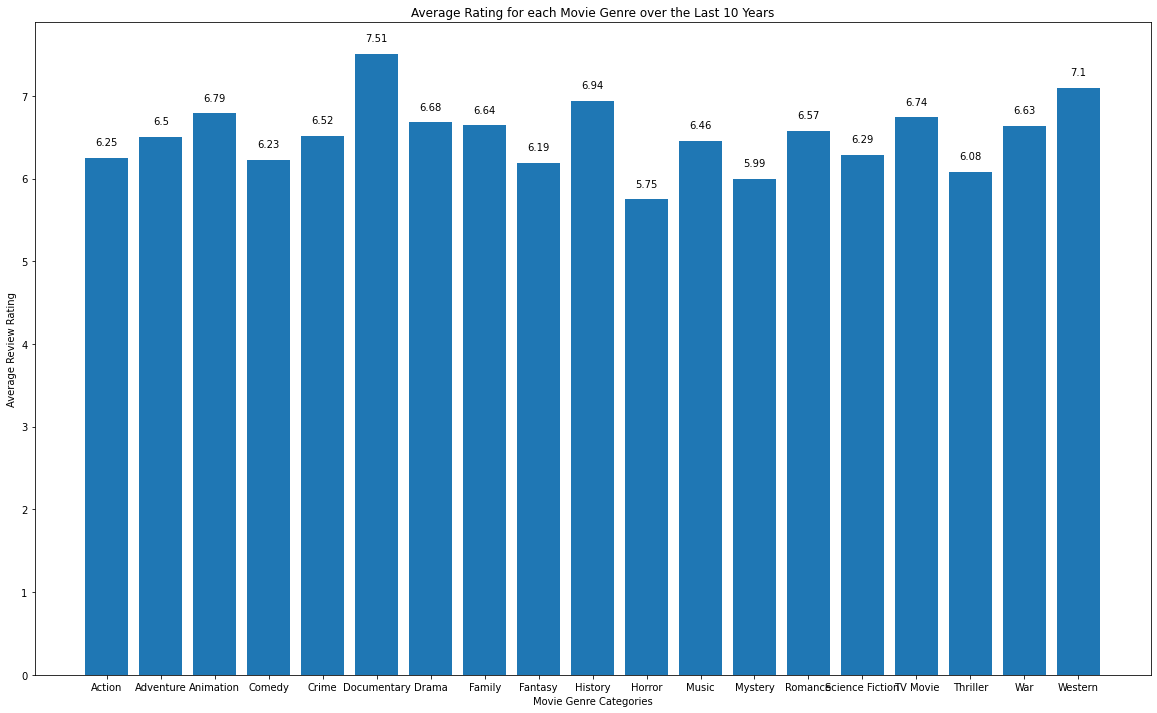

In [30]:
# Setting the figure and figure size
fig, ax = plt.subplots(figsize=(20, 12))

# creating the graph using our xlabel and ylabel that we defined above
ax.bar(x= xlabel, height = ylabel['vote_average'])
# setting axis labels and title
ax.set_title('Average Rating for each Movie Genre over the Last 10 Years')
ax.set_xlabel('Movie Genre Categories')
ax.set_ylabel('Average Review Rating')
# setting bar labels for each average value over their respective column
for loc, label in enumerate(ylabel['vote_average']):
    ax.text(loc, label+.15, str(round(label, ndigits=2)), ha='center');

# Newest test methods

# ***********begin extra info where I created a combined_genres column
## ***This did not work, too many categories

#### For our later data analysis, lets combine the two genres into a list of lists that we will add as a third column
We are going to sort these so that our genre combos come out in the same order, regardless of primary/secondary for easy charting.

1) Merge primary and secondary into a list of lists

In [18]:
merged_genre = [list(x) for x in zip(list(df_filtered['primary_genre']), list(df_filtered['secondary_genre']))]

2) Remove any `None` type from the list of lists for the secondary genres

In [19]:
for genre in merged_genre:
    if genre[1] == None:
        genre.pop()

3) Sort the list based on the values for each list (each row) within the total list

In [20]:
for genre in merged_genre:
    genre.sort()

### Now that we have a list of the combined genres, we can turn it into a column.

In [22]:
df_filtered['combined_genres'] = merged_genre

In [23]:
df_filtered

,genre_ids,release_date,title,vote_average,vote_count,primary_genre,secondary_genre,combined_genres
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,Fantasy,"[Adventure, Fantasy]"
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,Adventure,"[Adventure, Fantasy]"
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368,Adventure,Action,"[Action, Adventure]"
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186,Action,Science Fiction,"[Action, Science Fiction]"
5,"[12, 14, 10751]",2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Adventure,Fantasy,"[Adventure, Fantasy]"
...,...,...,...,...,...,...,...,...
24369,"[18, 36, 35]",2017-11-22,The Man Who Invented Christmas,6.6,323,Drama,History,"[Drama, History]"
24383,[27],2018-10-05,Malevolent,5.0,236,Horror,None,[Horror]
24409,"[9648, 53]",2017-10-27,All I See Is You,4.9,311,Mystery,Thriller,"[Mystery, Thriller]"
24422,"[35, 18]",2018-02-16,The Party,6.4,229,Comedy,Drama,"[Comedy, Drama]"


## Now to complete the final setup before visualizations
We need to convert the sorted list that makes up the combined_genres column into categorical information

First step is to convert each row into a string:

In [46]:
df_filtered['combined_genres'] = df_filtered['combined_genres'].apply(lambda x: str(x))

Now that the data is string, we can convert it to categorical data:

In [51]:
df_filtered['combined_genres'] = df_filtered['combined_genres'].astype('category')

We have 106 categories of coupled genre pairings

# Now lets start some data visualization!!


Below is plotting just the primary genre on the x-axis and all votes for each movie on the y-axis

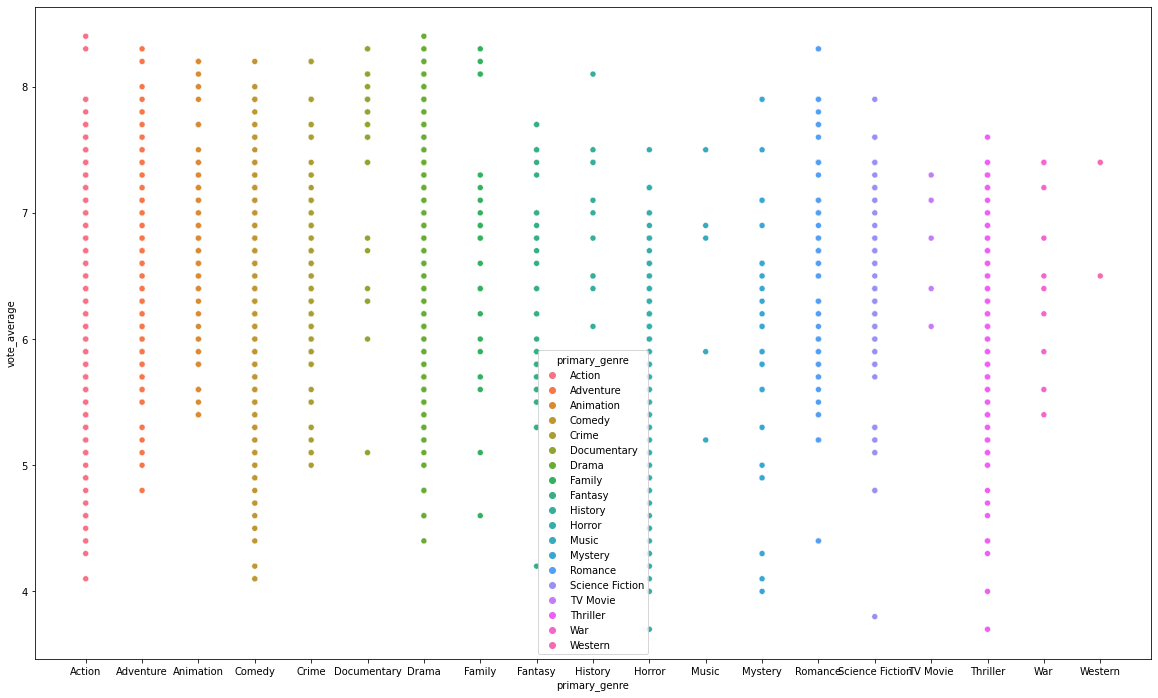

In [24]:
fig, ax = plt.subplots(figsize=(20, 12))


sns.scatterplot(data=df_filtered, 
                x=df_filtered['primary_genre'], 
                y=df_filtered['vote_average'], 
                hue=df_filtered['primary_genre']);

### Below is a time chart, date on the x-axis and each movies avg rating on the y-axis, points are color-coded for genre

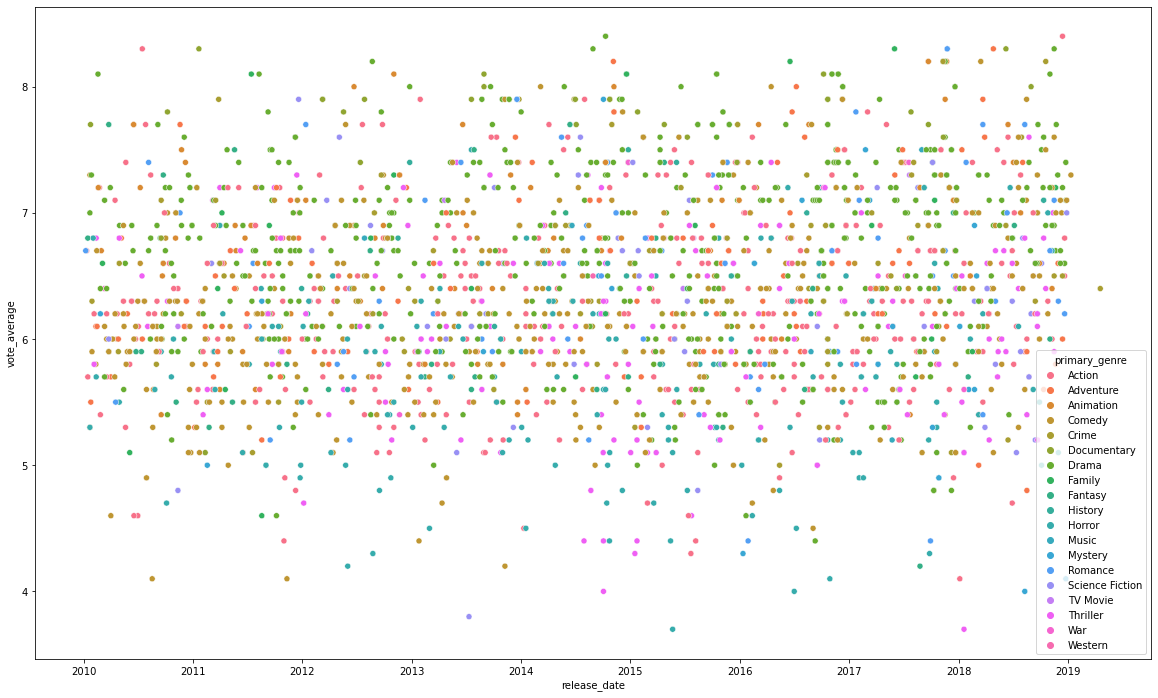

In [25]:
fig, ax = plt.subplots(figsize=(20, 12))


sns.scatterplot(data=df_filtered, 
                x=df_filtered['release_date'], 
                y=df_filtered['vote_average'], 
#                 for the 106 categories, use ['combined_genres']
#                 hue=df_filtered['combined_genres']);
                hue=df_filtered['primary_genre']);
#               The one above uses the 19 categories from just the primary_genre 

# STOP HERE -- Everything below is test. Data is fully cleaned above^^



**______________________________________________________________________________________________*

## Defining a function to add the column and give it a name

In [20]:
def add_genre_col(list_name, column_name):
    '''
    enter a list (list type) and
    a column name (str) to add a new column to the dataframe. 
    Then converts the dataframe using the dictionary key to show
    the text for the genre.
    
    '''
    df[column_name] = list_name
    df[column_name].replace(genre_key, inplace=True)
    
    return df
#     df['{list_name'] = list_name

In [23]:
add_genre_col(second_genre, 'second_genre')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,First_genre,first_genre_id,second_genre
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,12,Fantasy
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,14,Adventure
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Adventure,12,Action
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Animation,16,Comedy
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Action,28,Science Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,Horror,27,Drama
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,Drama,18,Thriller
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,Fantasy,14,Action
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family,10751,Adventure


## OK, thats a big mess that's hard to read, what if I group the data based on year and see if that helps?

In [28]:
df_filtered.groupby(df.release_date.dt.year)['vote_average'].mean()

release_date
2010    6.323711
2011    6.269397
2012    6.333005
2013    6.342083
2014    6.460145
2015    6.327157
2016    6.394479
2017    6.454000
2018    6.504310
2019    6.850000
Name: vote_average, dtype: float64

## That's not what I was looking for^^
it created a new column of the average of ALL movies in a given year

Now I will try to slice each genre then run the above code to clearly get yearly avgs

In [52]:
test_df = df_clean[df_clean['First_genre'] == 'Adventure']
test_df
test_df['Adventure_yearly avgs'] = test_df.groupby(test_df.release_date.dt.year)['vote_average'].transform('mean')

<ipython-input-52-f9eb00a35867>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Adventure_yearly avgs'] = test_df.groupby(test_df.release_date.dt.year)['vote_average'].transform('mean')


In [60]:
test_df['year'] = test_df['release_date'].dt.year

<ipython-input-60-ab8ade4449d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['year'] = test_df['release_date'].dt.year


In [49]:
# # This is me trying to run the above code in a for loop to do it all at once,
# # needs some work still
# for value in genre_key.values():
#     if df[df['First_genre'] is value]:
#         test_df = df.groupby(df.release_date.dt.year)['vote_average'].transform('mean')
    
# print(test_df)    
# # df[df['First_genre'] == 'Adventure']

In [70]:
adventure_year_avgs = test_df.drop_duplicates(subset='year')

In [72]:
adventure_year_avgs

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,First_genre,first_genre_id,second_genre,Adventure_yearly avgs,year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,12,Fantasy,6.392308,2010
2468,"[12, 14, 28]",10195,en,Thor,38.068,2011-05-06,Thor,6.7,12764,Adventure,12,Fantasy,6.273333,2011
5180,"[12, 14, 28]",49051,en,The Hobbit: An Unexpected Journey,26.939,2012-12-14,The Hobbit: An Unexpected Journey,7.2,12076,Adventure,12,Fantasy,6.285714,2012
7890,"[12, 14, 28]",57158,en,The Hobbit: The Desolation of Smaug,21.275,2013-12-13,The Hobbit: The Desolation of Smaug,7.6,7739,Adventure,12,Fantasy,6.700000,2013
11024,"[12, 10751, 16, 28, 35]",177572,en,Big Hero 6,36.920,2014-11-07,Big Hero 6,7.8,10176,Adventure,12,Family,7.042857,2014
14189,"[12, 14]",68737,en,Seventh Son,22.856,2015-02-06,Seventh Son,5.3,1549,Adventure,12,Fantasy,6.331250,2015
17382,"[12, 28, 878]",271110,en,Captain America: Civil War,39.137,2016-05-06,Captain America: Civil War,7.4,14000,Adventure,12,Action,6.728000,2016
17538,"[12, 18, 36]",314095,en,The Lost City of Z,11.048,2017-04-21,The Lost City of Z,6.2,1397,Adventure,12,Drama,6.560000,2017
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Adventure,12,Action,6.809091,2018


<AxesSubplot:xlabel='year', ylabel='Adventure_yearly avgs'>

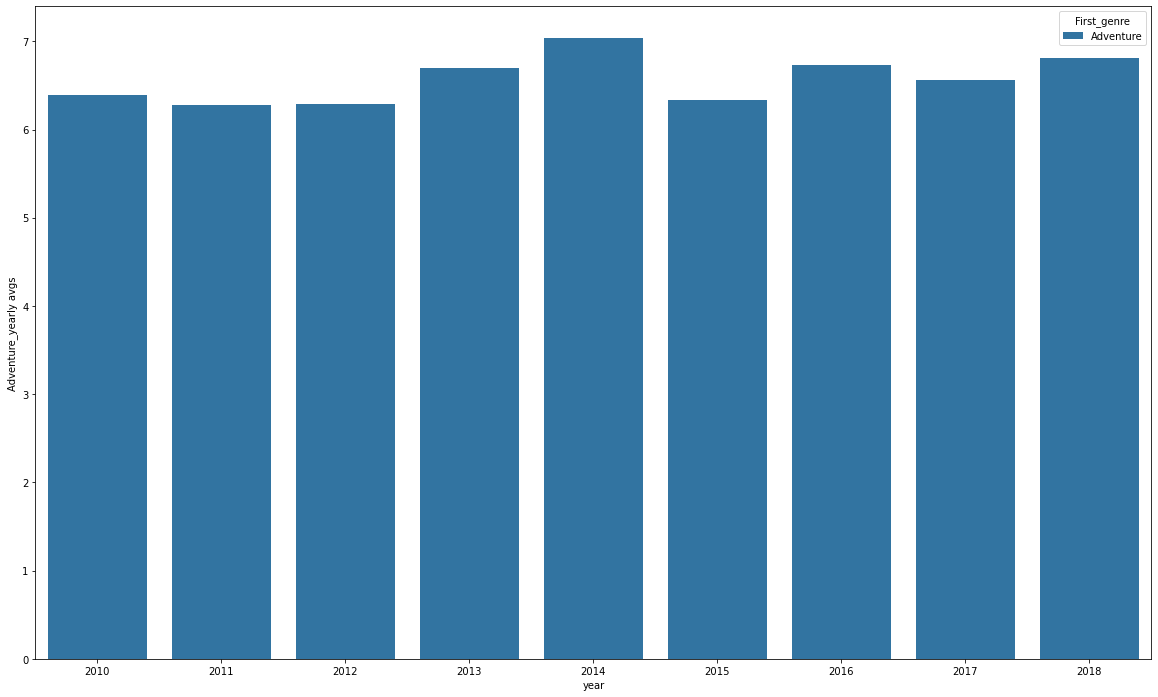

In [73]:
fig, ax = plt.subplots(figsize=(20, 12))

# ax.scatter(df_clean['release_date'], df_clean['vote_average'], c = df_clean['First_genre_id']);

sns.barplot(data=adventure_year_avgs, x=adventure_year_avgs['year'], y=adventure_year_avgs['Adventure_yearly avgs'], hue=test_df['First_genre'])